# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree


In [2]:
# Como os dados não estão mais disponíveis para download direto pelo sklearn.
    ## Download dos dados
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])


    ## Download dos metadados

dados = requests.get(data_url)
encontrar = ['CRIM',"$1000's"]
indice = list()
for i in encontrar:
    puxar = dados.text.find(i)
    indice.append(puxar)
metadados = dados.text[indice[0]:indice[1]]
display(metadados.split('\n'))
meta = list()
for i in metadados.split('\n'):
    meta.append([i.replace('  ','-1')])
    
df_meta = pd.DataFrame(meta)
df_meta[0].str.split('-1', expand=True)[0]
X = pd.DataFrame(data)
X.columns = df_meta[0].str.split('-1', expand=True)[0].tolist()[:-1]
y = pd.Series(raw_df.values[1::2, 2], name=df_meta[0].str.split('-1', expand=True)[0].tolist()[-1:][0])

['CRIM     per capita crime rate by town',
 ' ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 ' INDUS    proportion of non-retail business acres per town',
 ' CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 ' NOX      nitric oxides concentration (parts per 10 million)',
 ' RM       average number of rooms per dwelling',
 ' AGE      proportion of owner-occupied units built prior to 1940',
 ' DIS      weighted distances to five Boston employment centres',
 ' RAD      index of accessibility to radial highways',
 ' TAX      full-value property-tax rate per $10,000',
 ' PTRATIO  pupil-teacher ratio by town',
 ' B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 ' LSTAT    % lower status of the population',
 ' MEDV     Median value of owner-occupied homes in ']

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name:  MEDV, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    float64
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    float64
 9    TAX      506 non-null    float64
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
X.isnull().sum().sum()

0

In [7]:
X.duplicated().sum()

0

In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

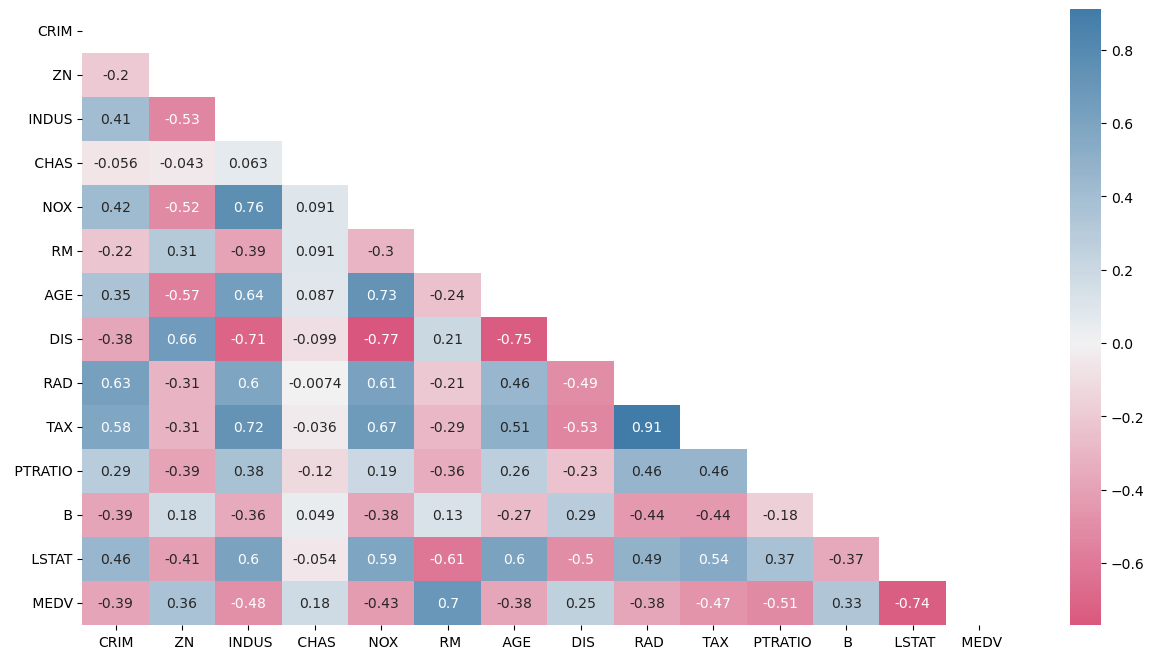

In [9]:
def correlacao_quan() -> None:
    numericos = pd.concat([X,y], axis=1)
    # Fazendo uma correlação não linear.
    numericos_cor = numericos.corr(method='pearson')
    # Criação da variação de cor.
    figura = plt.figure(figsize=(15,8))
    cmap = sns.diverging_palette(h_neg=0, h_pos=240, as_cmap=True, sep = 1, n=14, center='light') # Ajuste de cor
    
    mask = np.triu(np.ones_like(numericos_cor, dtype=bool)) # Aarranjo da matriz para somente mostrar os valores uma vez;
    
    corre = sns.heatmap(numericos_cor, center = 0, cmap = cmap, annot=True, mask=mask) # Plot
    
    return plt.show()

correlacao_quan()

- Analisando a tabela de correlação acima pela direção e força, 2 atributos podem ser classificados como ligação forte, sendo RM (O número médio de quartos por moradia) apresentando uma correlação positiva e LSTAT (% de baixo estatus/renda da população) apresentando uma correlação negativa.

### 3. Separe os dados em validação e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
arvore_1 = DecisionTreeRegressor(max_depth=8)
arvore_2 = DecisionTreeRegressor(max_depth=2)

reg_1 = arvore_1.fit(X_train, y_train)
reg_2 = arvore_2.fit(X_train, y_train)


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [12]:
## Teste sobre os dados de treinamento.

y_pred_1 = reg_1.predict(X_train)
y_pred_2 = reg_2.predict(X_train)
mse_1 = mean_squared_error(y_train, y_pred_1)
mse_2 = mean_squared_error(y_train, y_pred_2)
texto_1 = f"O resultado de MSE para os dados treinados com uma pré-poda de 8 foi de {round(mse_1,2)} para dados de treino"
texto_2 = f"O resultado de MSE para os dados treinados com uma pré-poda de 2 foi de {round(mse_2,2)} para dados de treino"
print(texto_1)
print(texto_2)
    

## Teste sobre os dados de previsão.

y_pred_1 = reg_1.predict(X_test)
y_pred_2 = reg_2.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
mse_2 = mean_squared_error(y_test, y_pred_2)
texto_1 = f"\nO resultado de MSE para os dados treinados com uma pré-poda de 8 foi de {round(mse_1,2)} para dados de teste"
texto_2 = f"O resultado de MSE para os dados treinados com uma pré-poda de 2 foi de {round(mse_2,2)} para dados de teste"
print(texto_1)
print(texto_2)

O resultado de MSE para os dados treinados com uma pré-poda de 8 foi de 1.42 para dados de treino
O resultado de MSE para os dados treinados com uma pré-poda de 2 foi de 23.27 para dados de treino

O resultado de MSE para os dados treinados com uma pré-poda de 8 foi de 32.59 para dados de teste
O resultado de MSE para os dados treinados com uma pré-poda de 2 foi de 35.41 para dados de teste


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

- O modelo com profundidade máxima de 8 aparenta ser a que melhor gerenaliza os dados, pois mantem os valores de erro menores do que o do outro modelo.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

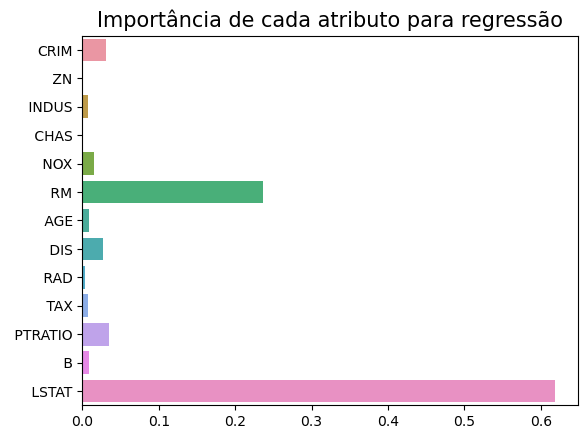

In [13]:
barra = sns.barplot(x = reg_1.feature_importances_, y = X.columns, orient='h')
barra.set_title("Importância de cada atributo para regressão", fontsize=15)
plt.show()

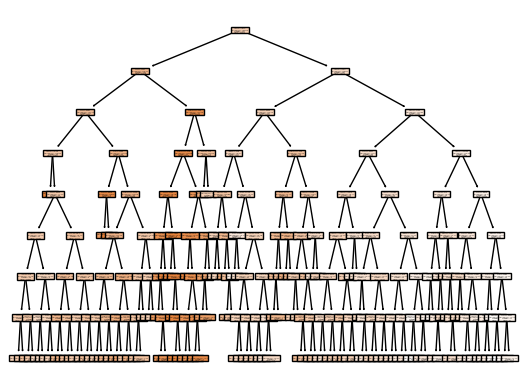

In [14]:
tp = tree.plot_tree(reg_1, feature_names = X.columns.tolist(), filled=True)